# SC2001 Project 2: The Dijkstra's Algorithm

### Importing Modules

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import heapq
import time
import random
import math

!pip install memory-profiler
from memory_profiler import memory_usage

# Part A

In [ ]:
# Priority Queue implemented with an array
class PriorityQueueArray(object):
  #consturctor
  def __init__(self):
    self.queue = []
  #checking if queue is empty
  def isEmpty(self):
    return len(self.queue) == 0
  #inserts an element into the queue
  def insert(self, data):
    self.queue.append(data)

  #pops an element based on Priority (minimum distance)
  def pop(self):
    min = -1
    for i in range(len(self.queue)):
      if self.queue[i][0] < self.queue[min][0]:
        min = i
    item = self.queue.pop(min)
    return item

  #removes a specific element from the queue
  def delete(self, x):
    for i in range(len(self.queue)):
      if self.queue[i][1] == x:
        self.queue.pop(i)
        break


In [ ]:
#Dijkstra's Algorithm using an Adjacency Matrix and Priority Queue Array
def dijkstra_adj_matrix_array(adj_matrix, source):

  V = len(adj_matrix)
  distance = [float('inf')] * V #array stores shortest distances to each vertex
  distance[0] = 0
  S = [False] * V #stores whether or not vertex has been visited
  pi = [-1] *V #stores predecessor
  pq = PriorityQueueArray() #initialize priority queue (array)

  #insert verticies into queue with current distance
  for v in range(len(adj_matrix)):
    pq.insert([distance[v], v])

  #go through the graph
  while not pq.isEmpty():
    u = pq.pop()#extract vertex with min distance
    S[u[1]] = True  #mark it as visited

    #check all vertices adjacent to u
    for v in range(len(adj_matrix[u[1]])):
      if adj_matrix[u[1]][v] != 0:  # If an edge exists between u and v
        if (S[v]!= True) and ((distance[u[1]] +adj_matrix[u[1]][v])<(distance[v])):  # If a shorter path is found
          #search for + remove v from queue
          for i in range(len(pq.queue)):
            if pq.queue[i][1] == v:
              pq.delete(i)
              break

          #update distance to v
          distance[v] = distance[u[1]] + adj_matrix[u[1]][v]
          pi[v] = u[1]  #update the predecessor
          pq.insert([distance[v], v])  #reinsertv into the priority queue

  return distance

In [ ]:
#TEST#
matrix = [[ 0,   4,   1,   0,   0],
          [ 4,   0,   2,   5,   0],
          [ 1,   2,   0,   8,  10],
          [ 0,   5,   8,   0,   2],
          [ 0,   0,  10,   2,   0]]

source = 0

# Check for time taken
start_time = time.time()

distances = dijkstra_adj_matrix_array(matrix, source)

# Check for time taken
end_time = time.time()

# Output the distances from the source
print("Shortest distances from source vertex:", distances)
print(f"Time taken: {end_time - start_time:.6f} seconds")


Shortest distances from source vertex: [0, 3, 1, 8, 10]
Time taken: 0.000160 seconds


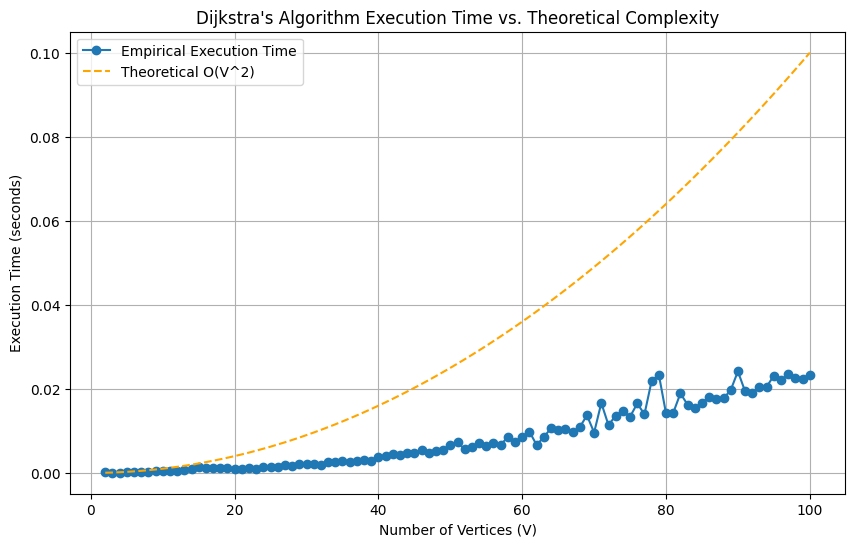

In [ ]:
#generate random graphs and measure execution time
V_values = range(2, 101)  # Number of vertices from 2 to 100
times = []

for V in V_values:
    #create a random adjacency matrix
    adj_matrix = np.random.randint(0, 10, size=(V, V))
    np.fill_diagonal(adj_matrix, 0)  #no self-loops

    start_time = time.time()
    dijkstra_adj_matrix_array(adj_matrix, 0)  # Run Dijkstra's algorithm
    execution_time = time.time() - start_time
    times.append(execution_time)

#theoretical time complexity O(V^2)
theoretical_times = [V**2 * 0.00001 for V in V_values]  # Scaling factor for visibility

#plotting
plt.figure(figsize=(10, 6))
plt.plot(V_values, times, label='Empirical Execution Time', marker='o')
plt.plot(V_values, theoretical_times, label='Theoretical O(V^2)', linestyle='dashed', color='orange')
plt.title("Dijkstra's Algorithm Execution Time vs. Theoretical Complexity")
plt.xlabel('Number of Vertices (V)')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid()
plt.show()

# Part B

##### store input graph in an array of adjacency lists and use minimising heap for priority queue.
##### then implement the Dijkstra's algorithm using this setting and analysing time complexity with respect to |V| and |E| both theoretically and empirically.

### dijkstra using array of adjacency list and minimising heap for priority queue

In [ ]:
def dijkstra_b(adj_list, source):
  # find the number of vertices for the graph
  V = len(adj_list)

  # initialise array and fill it with V elements
  distance = [float('inf')] * V # initialise the distance to infinite because dont know the distance yet
  distance[source] = 0 # set distance from source to itself as 0

  # min heap
  priorityQueue = [(0, source)]

  # tracker for whether vertex has been visited
  visited = [False] * V

  # go through the graph
  while priorityQueue:
    # heappop used to remove and return smallest element from heap
    current_distance, u = heapq.heappop(priorityQueue) #(distance, vertex node)

    # check if current node has been visited
    #if yes, move onto next while iteration # dijkstra algo oni process each node ONCE
    if visited[u]:
      continue
    # if not, then mark it as visited now since it has been visited now
    visited[u] = True

    # iterate over the neighbours of u(current node) and determine if a shorter path can be found
    for v, weight in adj_list[u]:
      # check if neighbour node has been processed and check if distance to u is better/shorter than distance to v
      if not visited[v] and distance[u] + weight < distance[v]:
        distance[v] = distance[u] + weight
        heapq.heappush(priorityQueue, (distance[v], v))
  return distance

In [ ]:
# TEST TO SEE IF THE DIJKSTRA WORKS
adj_list = [
    [(1, 4), (2, 1)],
    [(0, 4), (2, 2), (3, 5)],
    [(0, 1), (1, 2), (3, 8), (4, 10)],
    [(1, 5), (2, 8), (4, 2)],
    [(2, 10), (3, 2)]
]

source = 0

# Check for time taken
start_time = time.time()

# Run Dijkstra's algorithm
distances = dijkstra_b(adj_list, source)

# Check for time taken
end_time = time.time()

# Output the distances from the source
print(f"Shortest distances from node {source} to rest of the node: {distances}")
print(f"Time taken: {end_time - start_time:.6f} seconds")

Shortest distances from node 0 to rest of the node: [0, 3, 1, 8, 10]
Time taken: 0.000098 seconds


In [ ]:
# generate random graph for understanding of average performance
def generate_random_graph(V, E):
  adj_list = [[] for _ in range(V)] # create a list with V amt of elements (each node is one element)
  # set the edges to avoid dup edges
  edges = set()

  while len(edges) < E:
    u = random.randint(0, V-1)
    v = random.randint(0, V-1)
    if u != v and (u, v) not in edges and (v, u) not in edges:
      weight = random.randint(1, 10)
      adj_list[u].append((v, weight))
      adj_list[v].append((u, weight))
      edges.add((u, v))
      #edges.add((v, u))
  return adj_list

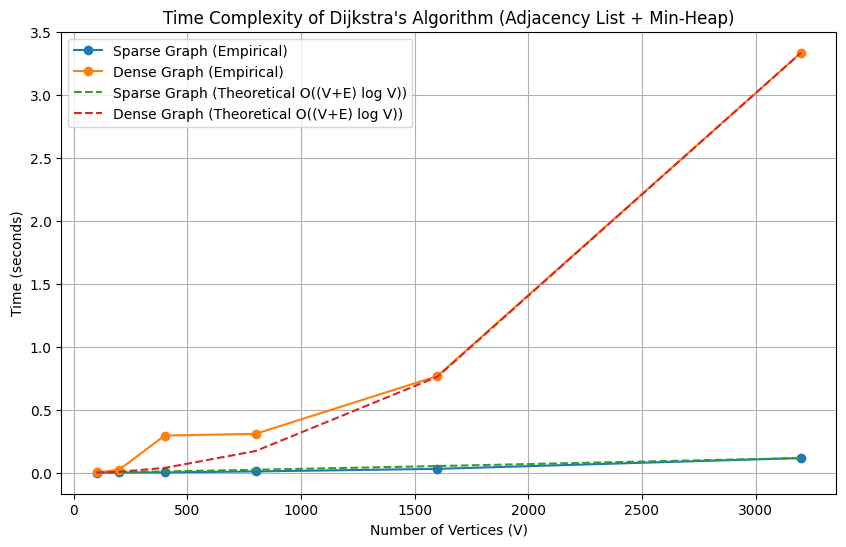

In [ ]:
# test
def time_complexity_empirical_b(v_range, edge='edge mode'):
  times = []
  for v in v_range:
    if edge == 'sparse':
      e = v * 10
    elif edge == 'dense':
      e = v * ((v-1)//2)

    adj_list = generate_random_graph(v, e)
    #measure time taken
    start_time = time.time()
    dijkstra_b(adj_list, 0)
    end_time = time.time()
    times.append(end_time-start_time)
  return times

# set vertices to plot time complexity for empirical analysis
vertices_range = [100, 200, 400, 800, 1600, 3200]
empirical_sparse_times = time_complexity_empirical_b(vertices_range, edge='sparse')
empirical_dense_times = time_complexity_empirical_b(vertices_range, edge='dense')

# set to plot time complexity for theoretical analysis
def time_complexity_theoretical_b(v, e):
  return ((v+e) * np.log(v))

theoretical_sparse_times = [time_complexity_theoretical_b(v, v*10) for v in vertices_range]
theoretical_dense_times = [time_complexity_theoretical_b(v, (v*(v-1)//2)) for v in vertices_range]
## TEST ##
normalised_sparse = [t/max(theoretical_sparse_times)*max(empirical_sparse_times) for t in theoretical_sparse_times]
normalised_dense = [t/max(theoretical_dense_times)*max(empirical_dense_times) for t in theoretical_dense_times]

# Plotting the time complexity for both sparse and dense graphs
plt.figure(figsize=(10, 6))
plt.plot(vertices_range, empirical_sparse_times, marker='o', label='Sparse Graph (Empirical)')
plt.plot(vertices_range, empirical_dense_times, marker='o', label='Dense Graph (Empirical)')
plt.plot(vertices_range, normalised_sparse, '--', label='Sparse Graph (Theoretical O((V+E) log V))')
plt.plot(vertices_range, normalised_dense, '--', label='Dense Graph (Theoretical O((V+E) log V))')
plt.title("Time Complexity of Dijkstra's Algorithm (Adjacency List + Min-Heap)")
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()

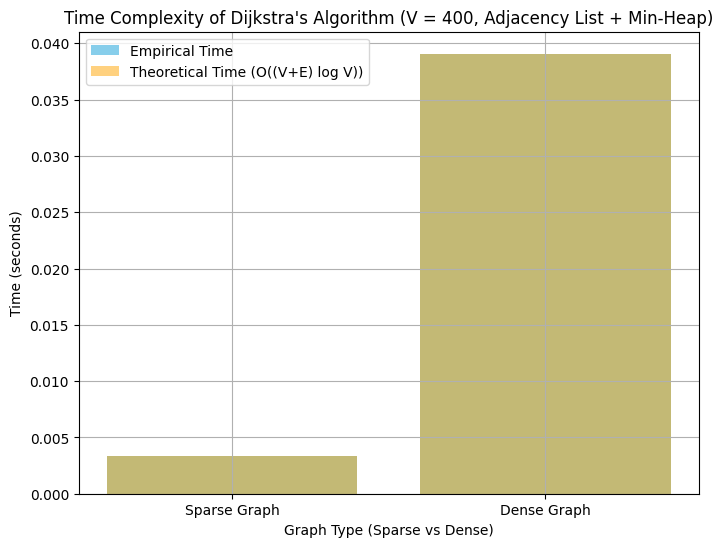

'\n# Plotting the time complexity for both sparse and dense graphs\nplt.figure(figsize=(10, 6))\nplt.subplot(1, 2, 1)\nplt.plot(vertice, empirical_sparse_times, marker=\'o\', label=\'Sparse Graph (Empirical)\')\nplt.plot(vertice, normalised_sparse, \'--\', label=\'Sparse Graph (Theoretical O((V+E) log V))\')\nplt.title("Time Complexity of Dijkstra\'s Algorithm (Adjacency List + Min-Heap) on Sparse Graphs")\nplt.xlabel("Number of Vertices (V)")\nplt.ylabel("Time (seconds)")\nplt.grid(True)\nplt.legend()\n\nplt.subplot(1, 2, 2)\nplt.plot(vertice, empirical_dense_times, marker=\'o\', label=\'Dense Graph (Empirical)\')\nplt.plot(vertice, normalised_dense, \'--\', label=\'Dense Graph (Theoretical O((V+E) log V))\')\nplt.title("Time Complexity of Dijkstra\'s Algorithm (Adjacency List + Min-Heap) on Dense Graphs")\nplt.xlabel("Number of Vertices (V)")\nplt.ylabel("Time (seconds)")\nplt.grid(True)\nplt.legend()\n'

In [ ]:
# generate time complexity for sparse and dense graph separately, vertice fixed at 400
def time_complexity_empirical_b(v, edge='edge mode'):
  if edge == 'sparse':
    e = v * 10
  elif edge == 'dense':
    e = v * ((v-1)//2)

  adj_list = generate_random_graph(v, e)
  #measure time taken
  start_time = time.time()
  dijkstra_b(adj_list, 0)
  end_time = time.time()
  time_taken = end_time-start_time
  return time_taken

# set vertices to plot time complexity for empirical analysis
vertice = 400
empirical_sparse_time = time_complexity_empirical_b(vertice, edge='sparse')
empirical_dense_time = time_complexity_empirical_b(vertice, edge='dense')

# set to plot time complexity for theoretical analysis
def time_complexity_theoretical_b(v, e):
  return ((v+e) * np.log(v))

theoretical_sparse_time = time_complexity_theoretical_b(vertice, vertice*10)
theoretical_dense_time = time_complexity_theoretical_b(vertice, (vertice*(vertice-1)//2))
normalised_sparse = theoretical_sparse_time / theoretical_sparse_time * empirical_sparse_time
normalised_dense = theoretical_dense_time / theoretical_dense_time * empirical_dense_time


# Plotting the time complexity for both sparse and dense graphs
graph_type = ['Sparse Graph', 'Dense Graph']
empirical_times = [empirical_sparse_time, empirical_dense_time]
theoretical_times = [normalised_sparse, normalised_dense]
plt.figure(figsize=(8, 6))
plt.bar(graph_type, empirical_times, color='skyblue', label='Empirical Time')
plt.bar(graph_type, theoretical_times, color='orange', alpha=0.5, label='Theoretical Time (O((V+E) log V))')

# Plot labels and title
plt.title("Time Complexity of Dijkstra's Algorithm (V = 400, Adjacency List + Min-Heap)")
plt.ylabel("Time (seconds)")
plt.xlabel("Graph Type (Sparse vs Dense)")
plt.legend()
plt.grid(True)
plt.show()
"""
# Plotting the time complexity for both sparse and dense graphs
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(vertice, empirical_sparse_times, marker='o', label='Sparse Graph (Empirical)')
plt.plot(vertice, normalised_sparse, '--', label='Sparse Graph (Theoretical O((V+E) log V))')
plt.title("Time Complexity of Dijkstra's Algorithm (Adjacency List + Min-Heap) on Sparse Graphs")
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(vertice, empirical_dense_times, marker='o', label='Dense Graph (Empirical)')
plt.plot(vertice, normalised_dense, '--', label='Dense Graph (Theoretical O((V+E) log V))')
plt.title("Time Complexity of Dijkstra's Algorithm (Adjacency List + Min-Heap) on Dense Graphs")
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
"""

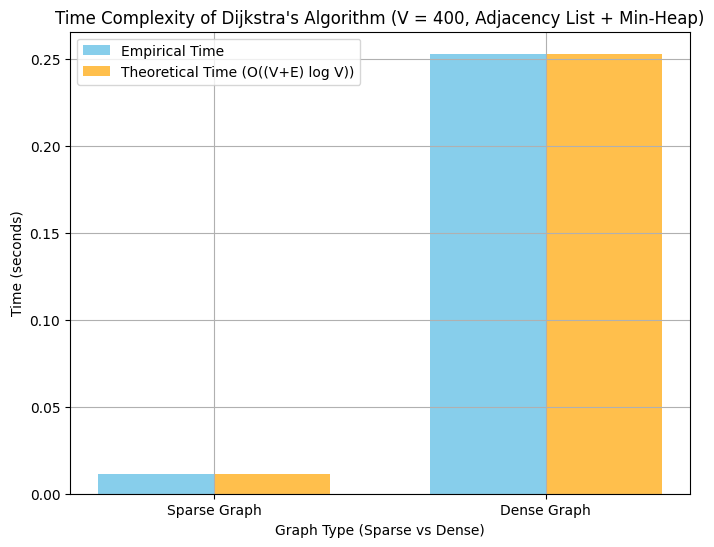

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import heapq

# Assuming generate_random_graph and dijkstra_b are defined already

# Generate time complexity for sparse and dense graphs with vertice fixed at 400
def time_complexity_empirical_b(v, edge='edge mode'):
    if edge == 'sparse':
        e = v * 10  # Sparse graph (10 edges per vertex)
    elif edge == 'dense':
        e = v * ((v-1)//2)  # Dense graph (complete graph)

    adj_list = generate_random_graph(v, e)

    # Measure time taken for Dijkstra's algorithm
    start_time = time.time()
    dijkstra_b(adj_list, 0)
    end_time = time.time()

    time_taken = end_time - start_time
    return time_taken

# Set vertices to 400 for empirical analysis
vertice = 400
empirical_sparse_time = time_complexity_empirical_b(vertice, edge='sparse')
empirical_dense_time = time_complexity_empirical_b(vertice, edge='dense')

# Set to plot time complexity for theoretical analysis
def time_complexity_theoretical_b(v, e):
    return (v + e) * np.log(v)

theoretical_sparse_time = time_complexity_theoretical_b(vertice, vertice * 10)
theoretical_dense_time = time_complexity_theoretical_b(vertice, (vertice * (vertice - 1)) // 2)

# Normalize theoretical times for comparison with empirical times
normalised_sparse = theoretical_sparse_time / theoretical_sparse_time * empirical_sparse_time
normalised_dense = theoretical_dense_time / theoretical_dense_time * empirical_dense_time

# Graph types and corresponding times
graph_type = ['Sparse Graph', 'Dense Graph']
empirical_times = [empirical_sparse_time, empirical_dense_time]
theoretical_times = [normalised_sparse, normalised_dense]

# Define bar width
bar_width = 0.35

# Create positions for bars
index = np.arange(len(graph_type))

# Plotting the bars side by side
plt.figure(figsize=(8, 6))
plt.bar(index, empirical_times, bar_width, color='skyblue', label='Empirical Time')
plt.bar(index + bar_width, theoretical_times, bar_width, color='orange', alpha=0.7, label='Theoretical Time (O((V+E) log V))')

# Add labels and title
plt.title("Time Complexity of Dijkstra's Algorithm (V = 400, Adjacency List + Min-Heap)")
plt.ylabel("Time (seconds)")
plt.xlabel("Graph Type (Sparse vs Dense)")

# Set x-ticks to display both types
plt.xticks(index + bar_width / 2, graph_type)

# Add a legend
plt.legend()

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()


### Time Complexity Analysis

#### Analysing time complexity theoretically:

#####<li> Extracting the minimum distance takes O(log|V|)
#####<li> Inserting or updating a vertex into the heap takes O(log|V|)
#####<li> Edge Relaxation: For each vertex, traversal through its neighbour edges takes O(|E|) time, since this algorithm requires iteration over all the edges once
#####<li> Thus, total time complexity is: <b><u>O((|V| + |E|)log|V|)</u></b>, where |V| is the number of vertices, |E| is the number of edges, log|V| accounts for the heap operations

#### Empirical Analysis:

In [ ]:
# test for sparse and dense graphs
def measure_time_complexity_b():
  # Assume varying amounts of vertices
  #vertices = [100, 200, 400, 800, 1600]
  vertices = [100, 500, 1000, 5000, 10000]
  # Store different timings
  sparse_times = []
  sparse_edges = []
  dense_times = []
  dense_edges = []

  for V in vertices:
    # Generate sparse graph
    E_sparse = V * 10
    adj_list_sparse = generate_random_graph(V, E_sparse)
    # Check for time taken
    start_time = time.time()
    # Run Dijkstra's algorithm
    dijkstra_b(adj_list_sparse, 0)
    # Check for time taken
    end_time = time.time()
    # Append timing into sparse time list
    sparse_times.append(end_time - start_time)
    sparse_edges.append(E_sparse)


    # generate dense graph
    E_dense = V * (V-1) //2
    adj_list_dense = generate_random_graph(V, E_dense)
    # Check for time taken
    start_time = time.time()
    # Run Dijkstra's algorithm
    dijkstra_b(adj_list_dense, 0)
    # Check for time taken
    end_time = time.time()
    # Append timing into sparse time list
    dense_times.append(end_time - start_time)
    dense_edges.append(E_dense)

  # Plotting the results
  plt.plot(sparse_edges, sparse_times, marker='o', label='Sparse Graph')
  plt.plot(dense_edges, dense_times, marker='x', label='Dense Graph')
  plt.xlabel('Grpah Size')
  plt.ylabel('Time (seconds)')
  plt.title('Dijkstra Algorithm Time Complexity Comparison')
  plt.grid(True)
  plt.legend()
  plt.show()

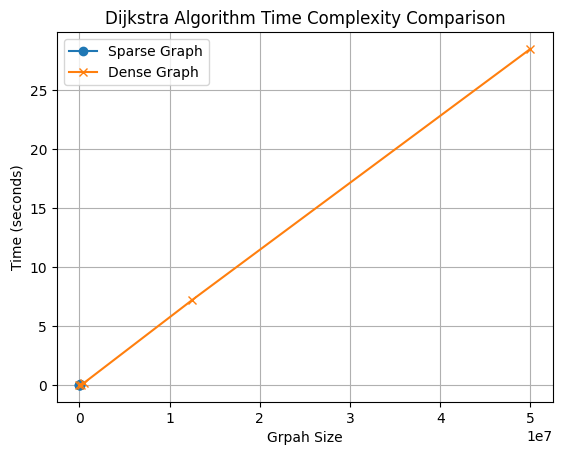

In [ ]:
measure_time_complexity_b()

In [ ]:
# test

# test for sparse and dense graphs
def measure_time_complexity_b_test():
  # Assume varying amounts of vertices
  vertices = [100, 200, 400, 800, 1600]
  #vertices = [100, 500, 1000, 5000, 10000]
  # Store different timings
  sparse_times = []
  dense_times = []

  for V in vertices:
    # Generate sparse graph
    E_sparse = V * 10
    adj_list_sparse = generate_random_graph(V, E_sparse)
    # Check for time taken
    start_time = time.time()
    # Run Dijkstra's algorithm
    dijkstra_b(adj_list_sparse, 0)
    # Check for time taken
    end_time = time.time()
    # Append timing into sparse time list
    sparse_times.append(end_time - start_time)


    # generate dense graph
    E_dense = V * (V-1) //2
    adj_list_dense = generate_random_graph(V, E_dense)
    # Check for time taken
    start_time = time.time()
    # Run Dijkstra's algorithm
    dijkstra_b(adj_list_dense, 0)
    # Check for time taken
    end_time = time.time()
    # Append timing into sparse time list
    dense_times.append(end_time - start_time)

  # Plotting the results
  plt.plot(vertices, sparse_times, marker='o', label='Sparse Graph')
  plt.plot(vertices, dense_times, marker='x', label='Dense Graph')
  plt.xlabel('Graph Size')
  plt.ylabel('Time (seconds)')
  plt.title('Dijkstra Algorithm Time Complexity Comparison')
  plt.grid(True)
  plt.legend()
  plt.show()

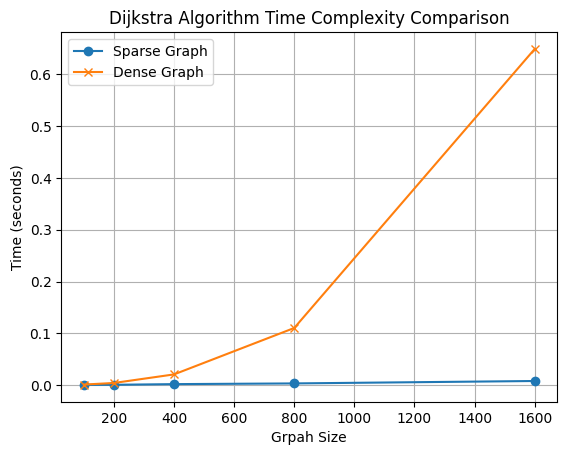

In [ ]:
measure_time_complexity_b_test()